# Data Training and Testing

In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn import tree, preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from tqdm import tqdm

from sklearn.metrics import \
    classification_report, \
    plot_confusion_matrix, \
    confusion_matrix, \
    roc_curve, \
    auc

sns.set_theme()

In [253]:
def load_data(path) -> pd.DataFrame:
    df = pd.read_csv(path)
    return df

def plot_ROC(y_test, y_pred, plt_config):    
        fpr, tpr, threshold = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=plt_config['figsize'])
        plt.title('ROC')
        plt.plot(fpr, tpr, 'b', label='ROC-AUC = %0.2f' % roc_auc)
        plt.plot([0,1], [0,1], 'y--', label='baseline')

        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc='best')
        plt.show()

def decisionTreeTrain(X_train, y_train, max_depth):
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    return clf

In [254]:
#df = load_data('../csv_data/user_1.csv')
df = load_data('../csv_data/user_1_timewindow10.csv')

In [255]:
df

,timestamp,dist_s,angle_s,mean_dist,min_dist,view_dist,average_mouse_speed,useful,useless,aiming,shooting,moving,class
0,2022-04-17 20:58:59,12234.817,851.264350,5926.058889,4293.470,66.360005,14.4,0,6,0,0,0,0
1,2022-04-17 20:59:00,12921.470,630.813630,5766.480000,4229.800,58.931064,14.4,0,5,0,0,0,0
2,2022-04-17 20:59:01,13246.160,633.257490,5617.644000,4191.120,51.505652,14.4,0,2,0,0,0,0
3,2022-04-17 20:59:02,13363.560,606.751820,5456.404000,3999.740,45.041425,14.4,0,1,0,0,0,0
4,2022-04-17 20:59:03,13455.260,587.234200,5282.626000,3633.000,36.861430,13.2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17185,2022-04-18 02:47:47,15528.310,151.689249,1737.436167,766.278,85.998414,3.2,0,0,0,0,0,0
17186,2022-04-18 02:47:48,14759.380,151.689249,1855.028143,766.278,85.650050,3.2,0,0,0,0,0,0
17187,2022-04-18 02:47:49,14001.000,151.689249,1966.402125,766.278,85.379100,3.2,0,0,0,0,0,0
17188,2022-04-18 02:47:50,13244.580,151.689249,2080.828556,766.278,85.162340,3.2,0,1,0,0,0,0


<AxesSubplot:ylabel='Frequency'>

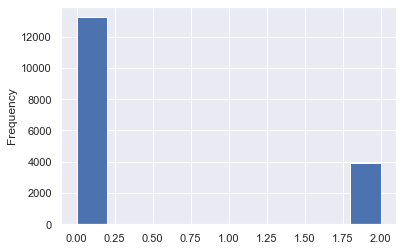

In [256]:
df['class'].plot.hist()

In [257]:
df = df.fillna(-10000)
# df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
df = df.replace((np.inf, -np.inf), 0).reset_index(drop=True)

data_X = df.drop(columns = ['timestamp', 'class'])
data_y = df['class']

# data_y = data_y.replace(2, 1)

In [258]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3)

X_train

,dist_s,angle_s,mean_dist,min_dist,view_dist,average_mouse_speed,useful,useless,aiming,shooting,moving
8971,2042.2460,1011.605921,-10000.000000,-10000.00,89.789000,13.5,4,17,0,0,8
15945,452.4180,120.540177,-10000.000000,-10000.00,-10000.000000,2.6,5,1,0,0,4
3990,1808.4842,1364.892200,-10000.000000,-10000.00,-10000.000000,16.4,21,14,0,0,10
15486,2794.7770,1067.855100,-10000.000000,-10000.00,-10000.000000,9.0,12,14,0,0,9
14030,1363.7957,289.899010,3164.860000,3067.61,35.118467,4.1,32,16,5,1,10
...,...,...,...,...,...,...,...,...,...,...,...
3980,2351.1091,1353.952633,-10000.000000,-10000.00,-10000.000000,13.1,9,10,0,0,8
10999,2955.0870,156.305610,1719.203333,1605.09,21.126563,1.5,9,20,1,0,10
4059,1814.9080,1526.965800,-10000.000000,-10000.00,-10000.000000,14.7,13,12,0,0,6
14654,25713.7000,0.000000,-10000.000000,-10000.00,-10000.000000,16.8,0,4,0,0,0


In [259]:
def scalar_normalize(X_train, X_test):
    min_max_scalar = preprocessing.MinMaxScaler()
    X_train_minmax = min_max_scalar.fit_transform(X_train)
    X_test_minmax = min_max_scalar.transform(X_test)
    X_train_scaled = preprocessing.scale(X_train_minmax)
    X_test_scaled = preprocessing.scale(X_test_minmax)
    X_train_normalized = preprocessing.normalize(X_train_scaled, norm='l2')
    X_test_normalized = preprocessing.normalize(X_test_scaled, norm='l2')
    return X_train_normalized, X_test_normalized

# X_train, X_test = scalar_normalize(X_train, X_test)

In [260]:
# model = KNeighborsClassifier(n_neighbors=7)
# model.fit(X_train, y_train)
model = decisionTreeTrain(X_train, y_train, max_depth=4)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3981
           2       0.91      0.81      0.85      1176

    accuracy                           0.94      5157
   macro avg       0.93      0.89      0.91      5157
weighted avg       0.94      0.94      0.94      5157



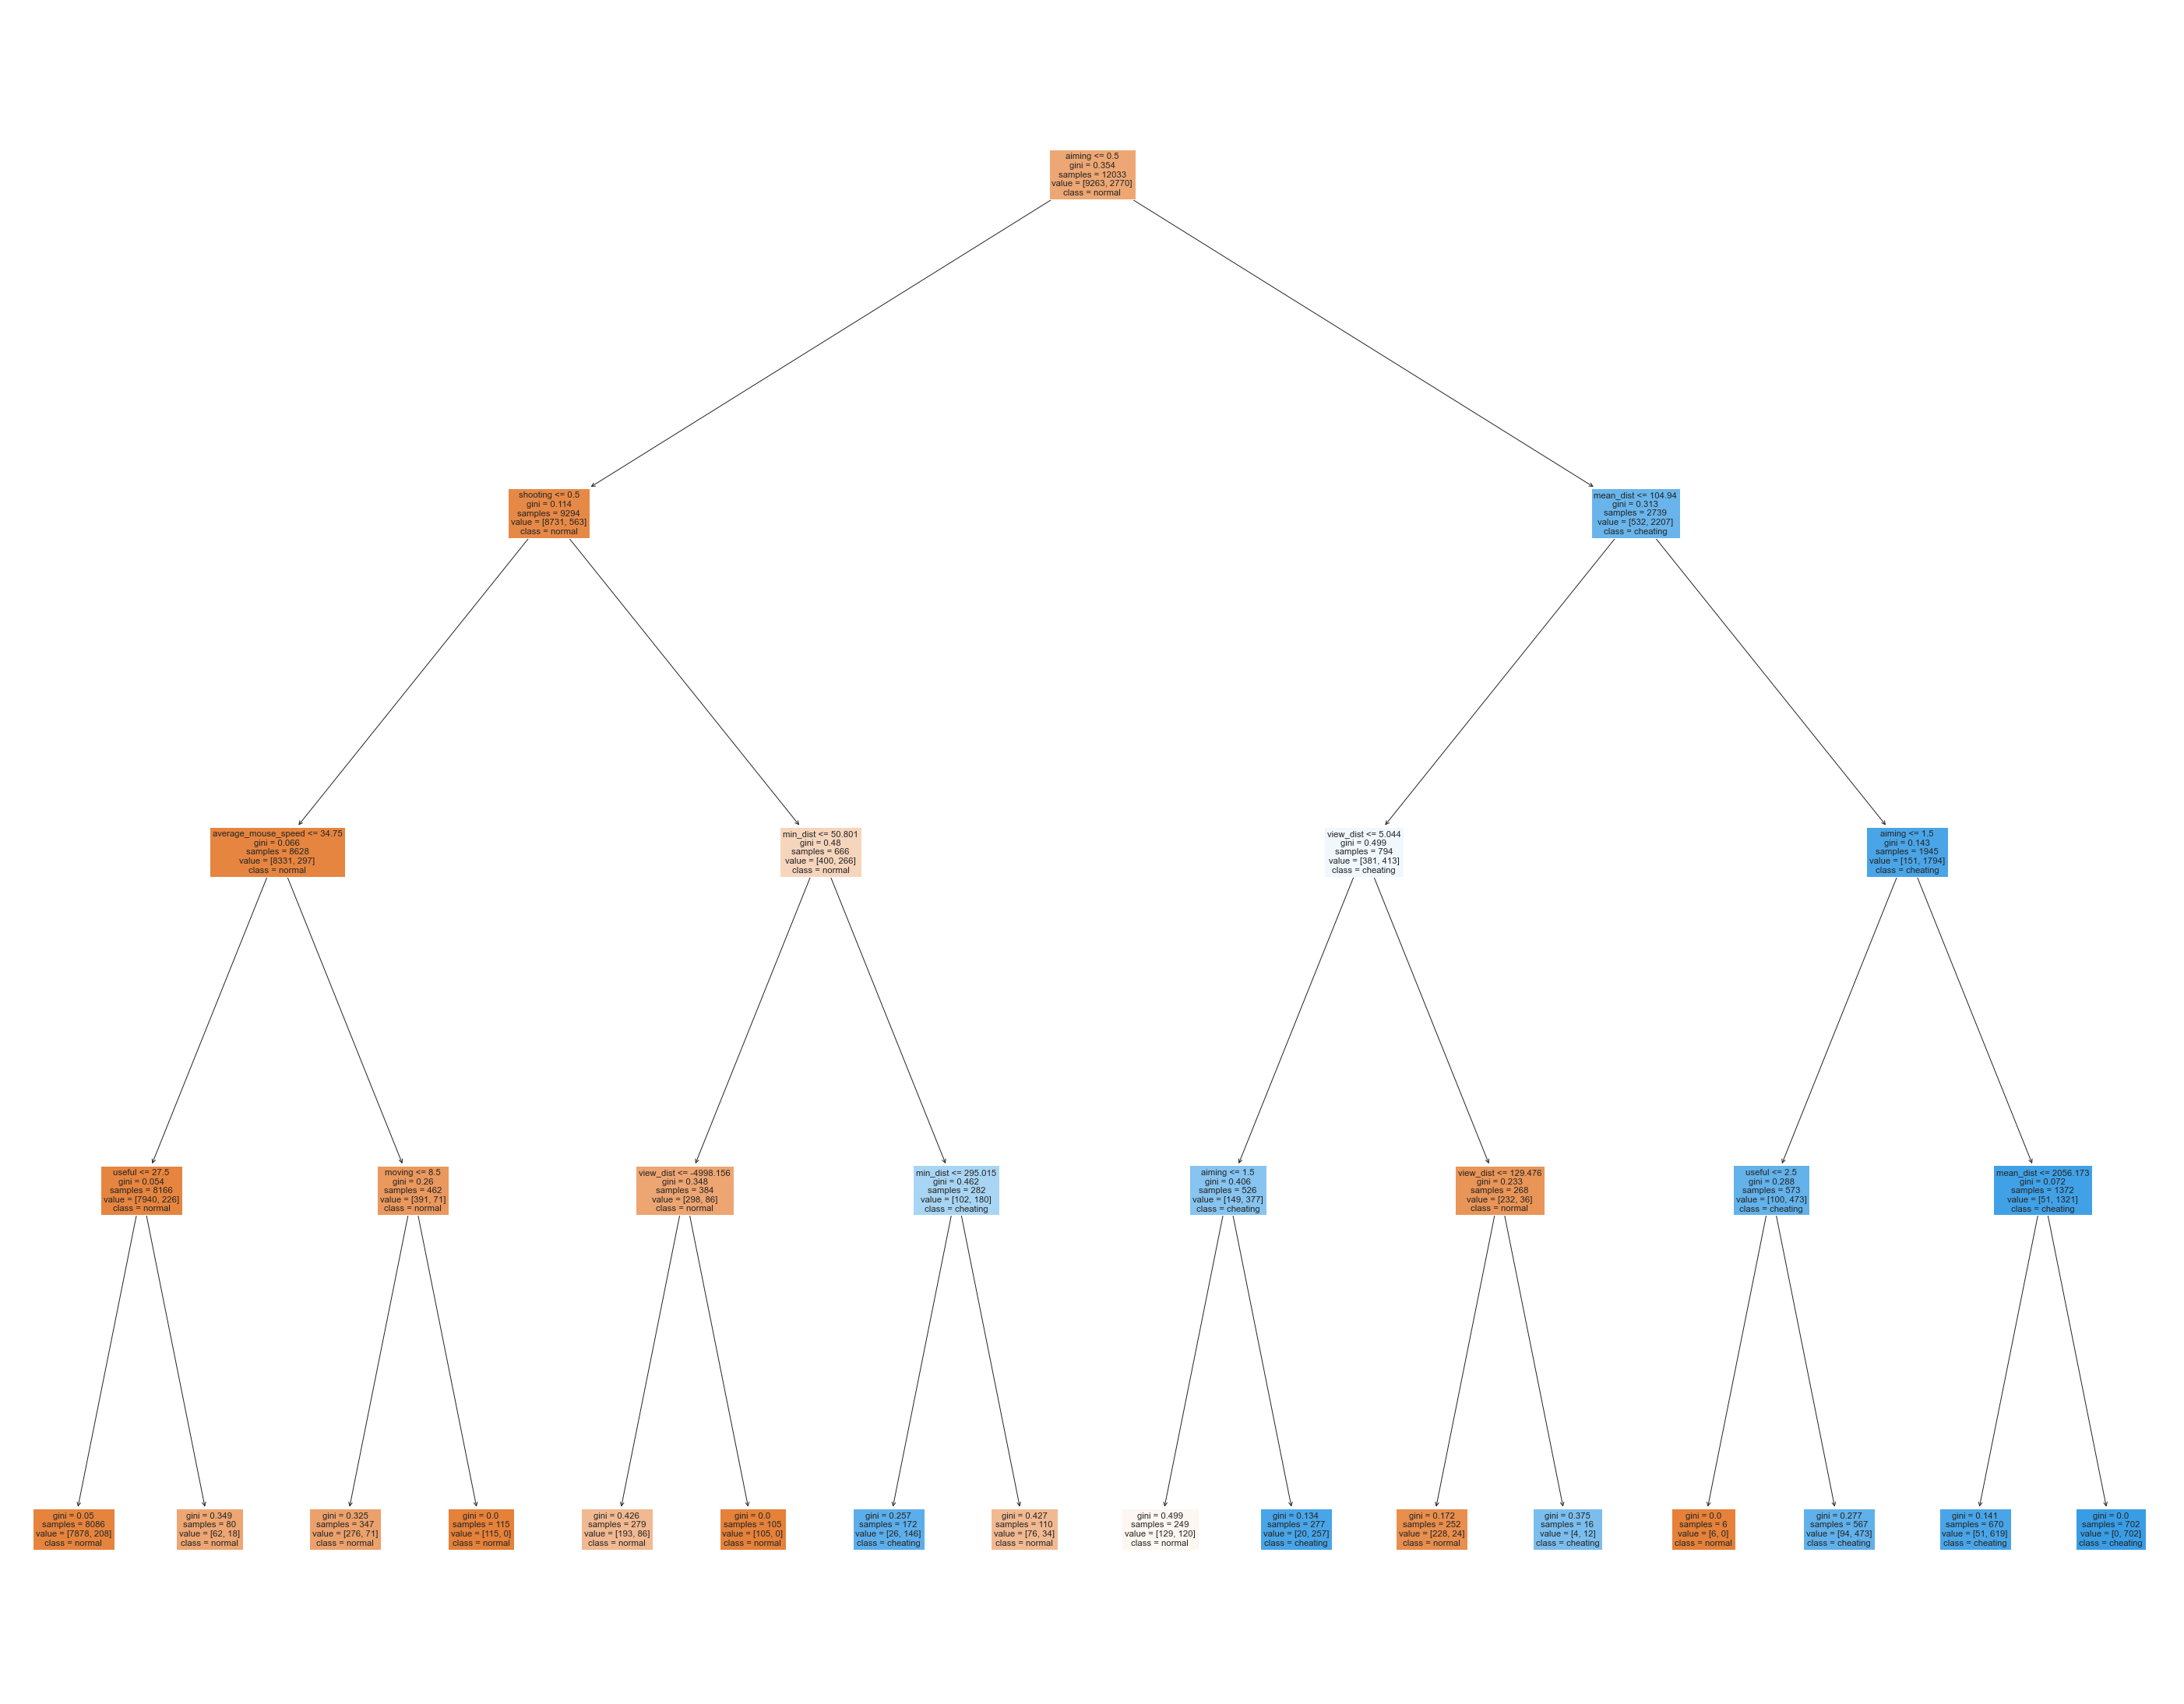

In [261]:
y_hat = model.predict(X_test)

print(classification_report(y_test, y_hat))

fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(model, feature_names=X_train.columns, \
    class_names = ['normal', 'cheating'], filled = True)

In [262]:
# try to do binary classification
data_X = data_X
binary_data_y = data_y.copy()
binary_data_y[binary_data_y>0] = 1

In [263]:
X_train, X_test, y_train, y_test = train_test_split(data_X, binary_data_y, test_size=0.3)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3996
           1       0.76      0.70      0.73      1161

    accuracy                           0.88      5157
   macro avg       0.84      0.82      0.83      5157
weighted avg       0.88      0.88      0.88      5157



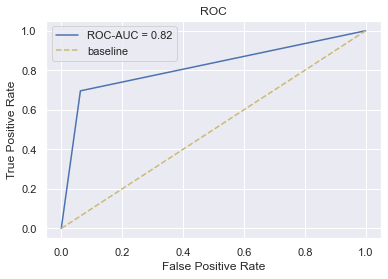

In [264]:
plt_config = {
    'figsize': (6, 4),
    # 'model': ad.mode + ' Detection'
}

plot_ROC(y_test, y_hat, plt_config)

In [265]:
# try SVM
svmclf = make_pipeline(preprocessing.StandardScaler(), SVC(kernel = 'rbf', gamma='auto', degree=1))
svmclf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(degree=1, gamma='auto'))])

In [266]:
y_hat = svmclf.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3996
           1       0.93      0.82      0.87      1161

    accuracy                           0.94      5157
   macro avg       0.94      0.90      0.92      5157
weighted avg       0.94      0.94      0.94      5157

